**Shooting method**

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def ode_RK4(f,t0,tf,y0=0,n=100):
    """
    First order ODE (y' = f(t,y)) Solver using RK4 method
     
    t0: initial value of independent variable
    tf: final value of independent variable
    y0: initial value of dependent variable
    n : number of steps
    f : function of f(t,y)
 
    The return is list of y(t)
    """
 
    t = np.linspace(t0,tf,n)
    y = list([y0])
    for i in range(n-1):
        h = t[i+1]-t[i]
        k1 = h*f(t[i],y[-1])
        k2 = h*f(t[i]+h/2.0,y[-1]+k1/2.0)
        k3 = h*f(t[i]+h/2.0,y[-1]+k2/2.0)
        k4 = h*f(t[i]+h,y[-1]+k3)
        y.append(y[-1]+(k1+2*k2+2*k3+k4)/6.0)
 
    y = np.array(y)
     
    return y

$y''+y=0$

$y(0)=0, y(\frac{13\pi}{2})=1$

Exact solution: $y(t) = sin(t)$

$u(t) = y(t), v(t) = y'(t)$

$Y(t) = (u(t),v(t))^T$

$Y'(t) = (u'(t), v'(t))^T = (v(t), -u(t))^T = F(t,Y(t))$

In [ ]:
def ode_shooting(F,t0,tf,y0,yf,n=100,tol=10**(-8),kmax=100):
  """
  The solver of Boundary Value Problem (y'' = f(t,y,y')) by shooting method
 
    F   : the vector type function
    t0  : initial value of independent variable
    tf  : final value of independent variable
    y0  : initial value of dependent variable
    yf  : final value of dependent variable
    tol : the tolerance 
    n   : number of time steps
    kmax: the maximal number of shootings  
 
    The return is a list of y(t)
  """
  #The initial guess of y'(0)
  yp0 = (yf-y0)/(tf-t0)
  #Set initial value of Y(t0)
  Y0 = np.array([y0,yp0])
  Y = ode_RK4(F,t0,tf,Y0,n)
  err = Y[-1][0]-yf
  Y0[1] =yp0 -0.1*np.sign(err)

  for k in range(kmax):
    Y = ode_RK4(F,t0,tf,Y0,n)
    err1 = Y[-1][0]-yf
    ddy = Y0[-1]-yp0
    if abs(err1)<tol or abs(ddy)<tol:
      # prepare output
      y = list()
      for x in Y:
        y.append(x[0])
      y = np.array(y)
      return y, Y0[1], err, k
    deddy = (err1-err)/ddy #The gradient of mismatching error
    yp0 = Y0[1]
    err = err1

    Y0[1] = Y0[1] -err/deddy #modify by secant method

  # prepare output
  y = list()
  for x in Y:
    y.append(x[0])
  y = np.array(y)
  return y, Y0[1], err, k




In [ ]:
def F(t,Y):
  return np.array([Y[1],-Y[0]])

In [ ]:
y0 =0
yf = 1
t0 = 0
tf = 13*pi/2
n = 100
yp0 = (yf-y0)/(tf-t0)+1
Y0 = np.array([y0,yp0])
Y = ode_RK4(F,t0,tf,Y0,n)
y = list()
for x in Y:
  y.append(x[0])
y = np.array(y)

In [ ]:
y.shape

(100,)

In [ ]:
y[-1]

1.0489154604558883

In [ ]:
Y[1]

array([0.21483294, 1.02673525])

In [ ]:
Y[-1]

array([1.04891546e+00, 3.18202506e-04])

In [ ]:
Y[-1][0]-yf

0.04891546045588835

In [ ]:
np.sign(-0.100)

-1.0

In [ ]:
y,yp,err,k = ode_shooting(F,0,13*pi/2,0,1,100)

In [ ]:
y

array([ 0.        ,  0.20481436,  0.40094563,  0.58007907,  0.73462055,
        0.85801849,  0.9450416 ,  0.99200069,  0.99690502,  0.95954673,
        0.88150961,  0.76610201,  0.61821653,  0.44412264,  0.25120088,
        0.04762996, -0.15795996, -0.35685314, -0.54061774, -0.70146328,
       -0.83257093, -0.92838258, -0.98483643, -0.99953923, -0.97186772,
       -0.90299505, -0.79584103, -0.65494837, -0.4862901 , -0.2970163 ,
       -0.09515105,  0.1107478 ,  0.31195142,  0.49993   ,  0.66671444,
        0.80523412,  0.90961669,  0.97543702,  0.99990477,  0.9819827 ,
        0.92243064,  0.82377327,  0.69019311,  0.52735316,  0.34215686,
        0.14245542, -0.06328503, -0.26634238, -0.45810823, -0.63045292,
       -0.77607011, -0.88878656, -0.96382383, -0.99800083, -0.98986872,
       -0.93977229, -0.84983537, -0.72387077, -0.56721864, -0.38652012,
       -0.18943571,  0.01567938,  0.22012955,  0.41524737,  0.59276106,
        0.74514514,  0.86593951,  0.95002325,  0.99383178,  0.99

In [ ]:
err

-0.851037100530065

In [ ]:
t = linspace(0,13*pi/2,100)
yt = sin(t)

In [ ]:
t.shape

(100,)

In [ ]:
y

array([ 0.        ,  0.20481436,  0.40094563,  0.58007907,  0.73462055,
        0.85801849,  0.9450416 ,  0.99200069,  0.99690502,  0.95954673,
        0.88150961,  0.76610201,  0.61821653,  0.44412264,  0.25120088,
        0.04762996, -0.15795996, -0.35685314, -0.54061774, -0.70146328,
       -0.83257093, -0.92838258, -0.98483643, -0.99953923, -0.97186772,
       -0.90299505, -0.79584103, -0.65494837, -0.4862901 , -0.2970163 ,
       -0.09515105,  0.1107478 ,  0.31195142,  0.49993   ,  0.66671444,
        0.80523412,  0.90961669,  0.97543702,  0.99990477,  0.9819827 ,
        0.92243064,  0.82377327,  0.69019311,  0.52735316,  0.34215686,
        0.14245542, -0.06328503, -0.26634238, -0.45810823, -0.63045292,
       -0.77607011, -0.88878656, -0.96382383, -0.99800083, -0.98986872,
       -0.93977229, -0.84983537, -0.72387077, -0.56721864, -0.38652012,
       -0.18943571,  0.01567938,  0.22012955,  0.41524737,  0.59276106,
        0.74514514,  0.86593951,  0.95002325,  0.99383178,  0.99

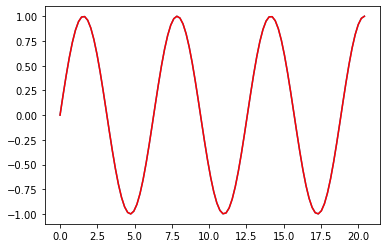

In [ ]:
plot(t,yt,t,y,'r')